# SB3 Algorithms

After initial (out the box) testing of each algorithm offered by Standard Baselines 3 (and contrib), this notebook offers a quick summary of all the algorithms training/performance evaluations.

### 1. Importing Relevant Modules, Algorithms and Policies

In [1]:
# Importing Required Modules
import gym
import numpy as np
import or_gym

import matplotlib.pyplot as plt

from tqdm import tqdm

# Importing PPO Algorithm and Base Policy
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.common.evaluation import evaluate_policy


### 2. Primitive Evaluation

Here we build a function which takes a specified algorith, policy and environment. It then builds the environment, sets up the model with the associated policy. Trains the model, while evaluating it at specified intervals. Then it returns the reward and error values of the evaluation at the specified timesteps.

In [2]:
def PrimitiveEval(alg, policy, environment, episodes=50000, div=50):
    """ Trains and evaluates agent performance with precision episodes/div

    Args:
        alg (SB3 Algorithm): Imported agent algorithm
        policy (SB3 Policy): Imported policy for the agent
        environment (string): Name of generated environment to train to
        episodes (int): Number of episodes the agent trains for
        div (int): Division Factor for precision of mean_reward array
        
    Returns:
        ep_arr (arr): Array of Timesteps at which evaluation occurs
        mean_rewards (arr): Average total reward over 100 episodes
        mean_error (arr): Average total error over 100 episodes
        
    """
    
    env = or_gym.make(environment)
    
    model = alg(policy, env, verbose=0) # Model Definition
    ep_arr = np.linspace(episodes/div, episodes, div) # Episodes Array (For Plotting)
    mean_reward = np.zeros(div) # Initialising Rewards Array
    mean_error = np.zeros(div) # Initialising Error Array
    
    for i in range(div):
        model.learn(total_timesteps=episodes/div, progress_bar=False)
        mean_reward[i], mean_error[i] = evaluate_policy(model, env, n_eval_episodes=100)
    
    return ep_arr, mean_reward, mean_error

### 3. Proof of Concept

In [8]:
a, b, c = PrimitiveEval(PPO, MlpPolicy, 'InvManagement-v1', episodes=250000);

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

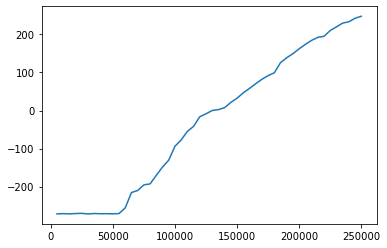

In [9]:
plt.plot(a,b);

### 4. Mass Evaluation

Now that we have the proof of concept, we can run a big for loop and get everything tested. (I have already tested everything and therefore have just kept in the algorithms and policies that actually work!) <br>

To do this, we're going to create a list of the algorithms and their respective policies, and then just iterate over the lists via their indices.

In [3]:
from stable_baselines3 import SAC
from stable_baselines3.sac.policies import MlpPolicy as SACPolicy

from stable_baselines3 import A2C
from stable_baselines3.a2c.policies import MlpPolicy as A2CPolicy

from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy as PPOPolicy

from sb3_contrib import ARS
from sb3_contrib.ars.policies import ARSPolicy

from sb3_contrib import RecurrentPPO
from sb3_contrib.ppo_recurrent.policies import RecurrentActorCriticPolicy

from sb3_contrib import TQC
from sb3_contrib.tqc.policies import MlpPolicy as TQCPolicy

from sb3_contrib import TRPO
from sb3_contrib.trpo.policies import MlpPolicy as TRPOPolicy

In [4]:
alg_names = [SAC, A2C, PPO, ARS, RecurrentPPO, TQC, TRPO] # Algorithms
model_names_strings = ["SAC", "A2C", "PPO", "ARS", "RecurrentPPO", "TQC", "TRPO"] # Strings of Algorithms
policies = [SACPolicy, A2CPolicy, PPOPolicy, ARSPolicy, RecurrentActorCriticPolicy, TQCPolicy, TRPOPolicy] # Policies

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

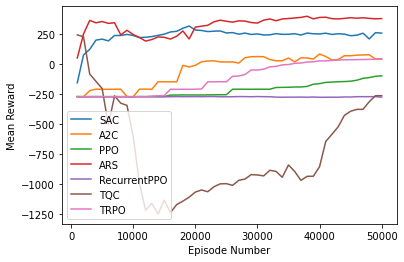

In [14]:
plt.figure()
for i in range(len(alg_names)):
    a,b,c = PrimitiveEval(alg_names[i], policies[i], 'InvManagement-v1')
    plt.plot(a,b,label=model_names_strings[i])
    
plt.xlabel('Episode Number')
plt.ylabel('Mean Reward')
plt.legend()

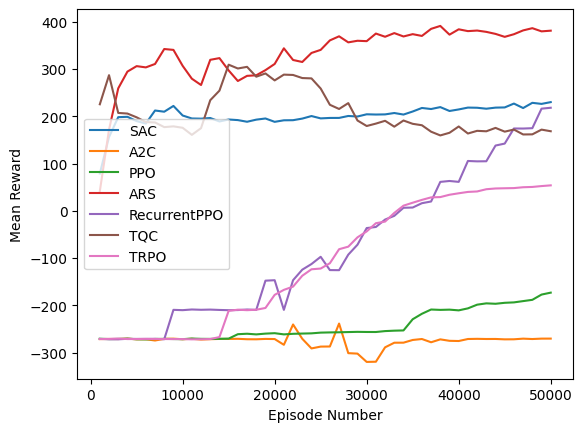

In [6]:
plt.figure()
for i in range(len(alg_names)):
    a,b,c = PrimitiveEval(alg_names[i], policies[i], 'InvManagement-v1')
    plt.plot(a,b,label=model_names_strings[i])
    
plt.xlabel('Episode Number')
plt.ylabel('Mean Reward')
plt.legend()

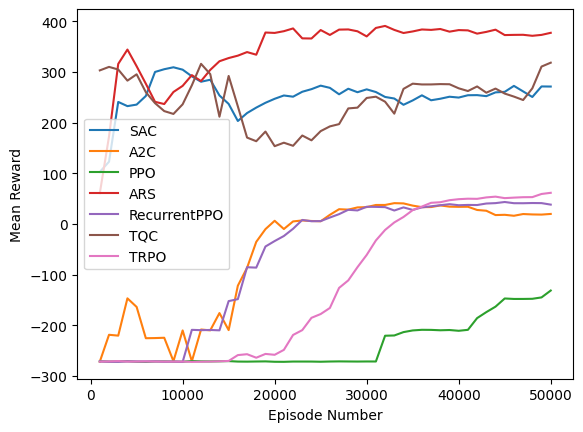

In [7]:
plt.figure()
for i in range(len(alg_names)):
    a,b,c = PrimitiveEval(alg_names[i], policies[i], 'InvManagement-v1')
    plt.plot(a,b,label=model_names_strings[i])
    
plt.xlabel('Episode Number')
plt.ylabel('Mean Reward')
plt.legend()

So the method above is a nice simple application. But we don't train rigorously as it can be shown from the reward values achieved, and we don't save the models. So lets do that now.

# Lets Improve with Monitors, Dictionaries and Best Models

### 1. Dictionary Definition

First of all, lets get in all of the algorithms and their respective policies. We put these all into a big ol' dictionary that we can use later on.

In [12]:
#### Initial Framework for a More Streamlined Approach?

from stable_baselines3 import SAC
from stable_baselines3.sac.policies import MlpPolicy as SACPolicy

from stable_baselines3 import A2C
from stable_baselines3.a2c.policies import MlpPolicy as A2CPolicy

from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy as PPOPolicy

from sb3_contrib import ARS
from sb3_contrib.ars.policies import ARSPolicy

from sb3_contrib import RecurrentPPO
from sb3_contrib.ppo_recurrent.policies import RecurrentActorCriticPolicy

from sb3_contrib import TQC
from sb3_contrib.tqc.policies import MlpPolicy as TQCPolicy

from sb3_contrib import TRPO
from sb3_contrib.trpo.policies import MlpPolicy as TRPOPolicy


alg_dictionary = {'SAC'   : [SAC, SACPolicy, "SAC"],
             'A2C'   : [A2C, A2CPolicy, "A2C"],
             'PPO' : [PPO, PPOPolicy, "PPO"],
             'ARS' : [ARS, ARSPolicy, "ARS"],
             'RecurrentPPO'  : [RecurrentPPO, RecurrentActorCriticPolicy, "RecurrentPPO"], 
             'TQC'  : [TQC, TQCPolicy, "TQC"],
             'TRPO'  : [TRPO, TRPOPolicy, "TRPO"]
            }

### 2. Proof of Concept

Model training:

In [102]:
def model_generation(alg_string="ARS", env=env):
    """_summary_

    Args:
        alg_string (str): _description_. Defaults to "ARS".
        env (Gym Environment): _description_. Defaults to env.

    Returns:
        _type_: _description_
    """
    
    
    alg, pol = alg_dictionary[alg_string][:2]
    
    model = alg(pol, env, **kwargs)
    
    
    return model

In [103]:

from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import DummyVecEnv, VecMonitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.monitor import Monitor
import torch as th
import os

'''
PARAMETERS
'''

logdir = './nb_logs/'
alg_string = "ARS"


env_seed = 0
env_name = 'InvManagement-v1'
env = or_gym.make(env_name, seed_int=42)
eval_env = or_gym.make(env_name, seed_int=42)
n_envs = 4
total_timesteps = 300000
kwargs = {
    'seed' : 0,
}


env = Monitor(env, logdir)



eval_callback = EvalCallback(eval_env=eval_env, best_model_save_path=logdir,
                            log_path=logdir, eval_freq=total_timesteps/(1000),
                            deterministic=True, render=False, verbose=0)



model = model_generation(alg_string, env)
model.learn(total_timesteps=total_timesteps, progress_bar=False, callback=eval_callback)
model.save(logdir + alg_dictionary[alg_string][2])

old_name = os.getcwd() + "/nb_logs/monitor.csv"
new_name = os.getcwd() + "/nb_logs/" + alg_string + "_monitor.csv"

os.rename(old_name, new_name)

old_name = os.getcwd() + "/nb_logs/best_model.zip"
new_name = os.getcwd() + "/nb_logs/" + alg_string + "_best_model.zip"

os.rename(old_name, new_name)


/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: 
Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode 
lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor``
wrapper.
  warnings.warn(

##### A bit of a bug here. I can't get utils to work (something to do with my path). So I found a workaround here:

In [104]:
import imp
import os

main_path = os.getcwd()
print(main_path)

utils_study = imp.load_source('utils.study_model', main_path + '/orgym/imp1/utils/study_model.py')
utils_train = imp.load_source('utils.training_history', main_path + '/orgym/imp1/utils/training_history.py')

/Users/nathan/Documents/GitHub/ChainRL

Now we're evaluating the trained model using modules from utils.

Mean cumlative reward on final model: 417.89065039999997+/-37.23954156070019
Mean cumlative reward on best model: 417.8443520999999+/-37.23612706282499


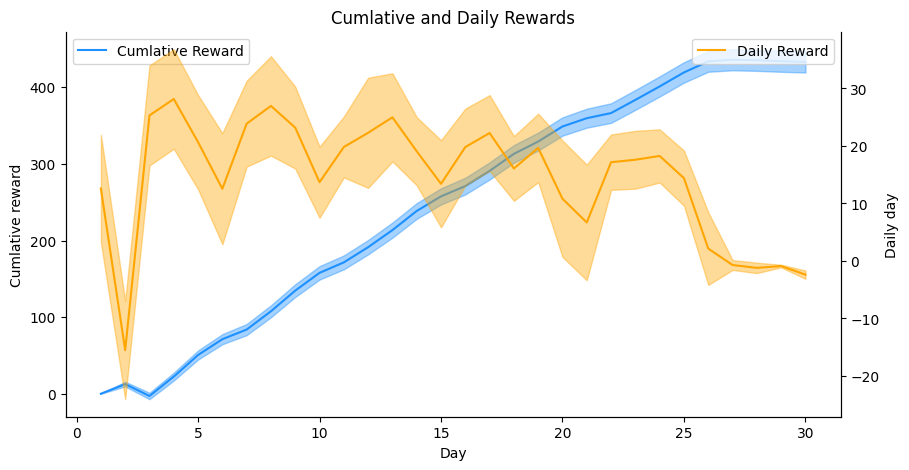

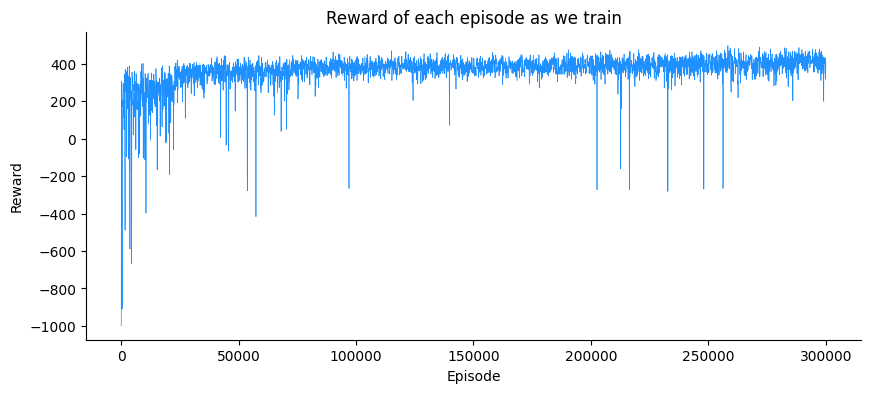

In [107]:
alg = alg_dictionary[alg_string][0]
env = or_gym.make(env_name, seed_int=42)

final_model = alg.load(logdir + alg_dictionary[alg_string][2], env=env)
mean_reward, std_reward = evaluate_policy(final_model, final_model.get_env(), n_eval_episodes=10)
print(f'Mean cumlative reward on final model: {mean_reward}+/-{std_reward}')

best_model = alg.load(logdir + alg_string + '_best_model', env=env)
mean_reward, std_reward = evaluate_policy(best_model, best_model.get_env(), n_eval_episodes=10)
print(f'Mean cumlative reward on best model: {mean_reward}+/-{std_reward}')

model_study = utils_study.EvalModel(env, best_model)
eval_rewards  = model_study.eval(20)
mean_rewards, std_rewards, upper_rewards, lower_rewards, cumrewards, upper_cumrewards, lower_cumrewards = model_study.reward_stats(eval_rewards,
                                                                                                                        logdir + alg_string +'_eval_results.csv')

model_study.plot_rewards(eval_rewards, logdir + alg_string + 'eval_plot.png')

train_history = utils_train.History(logdir + alg_string + '_monitor.csv')
train_history.plot_history(logdir + alg_string + '_train_plot.png')
train_history.save(logdir + alg_string + '_train_results.csv')

### 3. Mass Evaluation v2

In [111]:
def MonitorEval(alg_string):
    """_summary_

    Args:
        alg_string (_type_): _description_
    """
    
    logdir = './nb_logs/'
    env_seed = 0
    env_name = 'InvManagement-v1'
    env = or_gym.make(env_name, seed_int=42)
    eval_env = or_gym.make(env_name, seed_int=42)
    n_envs = 4
    total_timesteps = 300000
    kwargs = {
        'seed' : 0,
    }
    
    env = Monitor(env, logdir)
    
    eval_callback = EvalCallback(eval_env=eval_env, best_model_save_path=logdir,
                            log_path=logdir, eval_freq=total_timesteps/(1000),
                            deterministic=True, render=False, verbose=0)
    
    
    model = model_generation(alg_string, env)
    model.learn(total_timesteps=total_timesteps, progress_bar=True, callback=eval_callback)
    model.save(logdir + alg_dictionary[alg_string][2])

    old_name = os.getcwd() + "/nb_logs/monitor.csv"
    new_name = os.getcwd() + "/nb_logs/" + alg_string + "_monitor.csv"

    os.rename(old_name, new_name)

    old_name = os.getcwd() + "/nb_logs/best_model.zip"
    new_name = os.getcwd() + "/nb_logs/" + alg_string + "_best_model.zip"

    os.rename(old_name, new_name)
    
    return

In [109]:
MonitorEval("ARS")

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [112]:
alg_strings = ["SAC", "A2C", "PPO", "ARS", "RecurrentPPO", "TQC", "TRPO"] # Strings of Algorithms

for i in alg_strings:
    MonitorEval(i)

Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: 
Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode 
lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor``
wrapper.
  warnings.warn(

Output()

Output()

Output()

Output()

Output()

Output()

In [127]:
import imp
import os
import matplotlib


main_path = os.getcwd()

utils_study = imp.load_source('utils.study_model', main_path + '/orgym/imp1/utils/study_model.py')
utils_train = imp.load_source('utils.training_history', main_path + '/orgym/imp1/utils/training_history.py')

logdir = 'nb_logs/'

def FinalEvaluate(alg_string):
    """Generalises the evaluation from the previous section. We can run this through a for loop for a mass evaluation of each model.

    Args:
        alg_string (_type_): _description_
    """

    alg = alg_dictionary[alg_string][0]
    env = or_gym.make(env_name, seed_int=42)

    final_model = alg.load(logdir + alg_dictionary[alg_string][2], env=env)
    mean_reward, std_reward = evaluate_policy(final_model, final_model.get_env(), n_eval_episodes=10)
    print(f'Mean cumlative reward on final model: {mean_reward}+/-{std_reward}')

    best_model = alg.load(logdir + alg_string + '_best_model', env=env)
    mean_reward, std_reward = evaluate_policy(best_model, best_model.get_env(), n_eval_episodes=10)
    print(f'Mean cumlative reward on best model: {mean_reward}+/-{std_reward}')

    model_study = utils_study.EvalModel(env, best_model)
    eval_rewards  = model_study.eval(20)
    mean_rewards, std_rewards, upper_rewards, lower_rewards, cumrewards, upper_cumrewards, lower_cumrewards = model_study.reward_stats(eval_rewards,
                                                                                                                            logdir + alg_string +'_eval_results.csv')

    model_study.plot_rewards(eval_rewards, logdir + alg_string + 'eval_plot.png')

    train_history = utils_train.History(logdir + alg_string +  '_monitor.csv')
    train_history.plot_history(logdir + alg_string + '_train_plot.png')
    train_history.save(logdir + alg_string + '_train_results.csv')
    
    return

In [131]:
alg_strings = ["SAC", "A2C", "PPO", "ARS", "RecurrentPPO", "TQC", "TRPO"] # Strings of Algorithms
plt.rcParams['savefig.dpi'] = 900


for i in alg_strings:
    FinalEvaluate(i)

Mean cumlative reward on final model: -344.8041726+/-21.032369230316593
Mean cumlative reward on best model: 245.94241259999998+/-44.190859382910176
Mean cumlative reward on final model: 34.693553200000004+/-9.708249346821093
Mean cumlative reward on best model: 36.79200589999999+/-11.190568647335116
Mean cumlative reward on final model: 193.5703473+/-13.320400558087181
Mean cumlative reward on best model: 191.8057384+/-14.50254723931841
Mean cumlative reward on final model: 417.89065039999997+/-37.23954156070019
Mean cumlative reward on best model: 417.8443520999999+/-37.23612706282499
Mean cumlative reward on final model: 419.3120714+/-25.990473770974237
Mean cumlative reward on best model: 418.4853473+/-27.23046738367232
Mean cumlative reward on final model: -1202.2067890000003+/-11.783840953348372
Mean cumlative reward on best model: 286.35517990000005+/-37.30034324084888
Mean cumlative reward on final model: 399.05076030000004+/-18.523558165477237
Mean cumlative reward on best mod